In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\CODING\PYTHON\NLP\train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
new_df = df.sample(30000,random_state=2)

In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [9]:
new_df.duplicated().sum()

0

is_duplicate
0    19013
1    10987
Name: count, dtype: int64
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

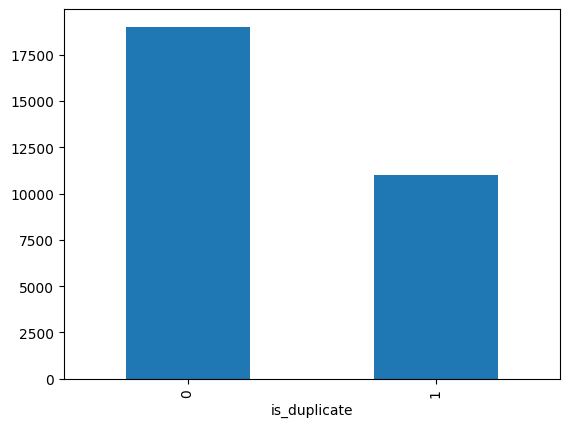

In [10]:
# Distribution of duplicate and non-duplicate questions
# This will show how many pairs are duplicates and how many are not
# This is useful for understanding the balance of the dataset

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100) # This will show the percentage of duplicates and non-duplicates
new_df['is_duplicate'].value_counts().plot(kind='bar')  # This will plot the distribution of duplicates and non-duplicates

In [11]:
# Repeated questions
# This will show how many questions are repeated in the dataset
# This is useful for understanding the diversity of questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())  # This will combine the question IDs from both columns into a single series
print('Number of unique questions',np.unique(qid).shape[0]) # This will show the number of unique questions
x = qid.value_counts()>1    # This will count how many times each question appears
print('Number of questions getting repeated',x[x].shape[0]) # This will show how many questions are repeated

Number of unique questions 55299
Number of questions getting repeated 3480


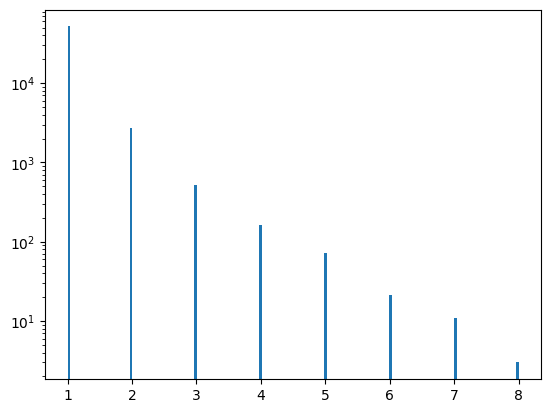

In [12]:
# Repeated questions histogram
# This will show the distribution of how many times questions are repeated
# This is useful for understanding the frequency of question repetition

plt.hist(qid.value_counts().values,bins=160)    # This will plot a histogram of the counts of repeated questions
plt.yscale('log')   # This will set the y-axis to a logarithmic scale for better visibility
plt.show()

In [13]:
# Feature Engineering
# This will create new features based on the questions
# This is useful for improving the model's performance

new_df['q1_len'] = new_df['question1'].str.len() # This will calculate the length of question 1
new_df['q2_len'] = new_df['question2'].str.len()    # This will calculate the length of question 2

In [14]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [15]:
# Calculating the number of words in each question
# This will help in understanding the length of the questions
# This is useful for feature engineering

new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" "))) # This will calculate the number of words in question 1
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" "))) # This will calculate the number of words in question 2
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [16]:
# Calculating the number of common words in both questions
# This will help in understanding the similarity between the questions
# This is useful for feature engineering


def common_words(row):  # This function calculates the number of common words between two questions
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))   # Convert question 1 to a set of words
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))       # Convert question 2 to a set of words
    return len(w1 & w2) # This will return the number of common words between the two sets

In [17]:
# Applying the common_words function to the DataFrame
# This will create a new column with the count of common words in both questions
# This is useful for feature engineering

new_df['word_common'] = new_df.apply(common_words, axis=1)  # This will apply the common_words function to each row of the DataFrame
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [18]:
# Calculating the total number of words in both questions
# This will help in understanding the overall length of the questions
# This is useful for feature engineering

def total_words(row):   # This function calculates the total number of unique words in both questions
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))   # Convert question 1 to a set of words
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    # Convert question 2 to a set of words
    return (len(w1) + len(w2)) # This will return the total number of unique words in both questions

In [19]:
# Applying the common_words function to the DataFrame
# This will create a new column with the total number of words in both questions
# This is useful for feature engineering

new_df['word_total'] = new_df.apply(total_words, axis=1) # This will return the total number of unique words in both questions
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13


In [20]:
# Calculating the share of common words in total words
# This will help in understanding the proportion of common words to total words

new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)  # This will calculate the share of common words in total words
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23


minimum characters 2
maximum characters 391
average num of characters 59


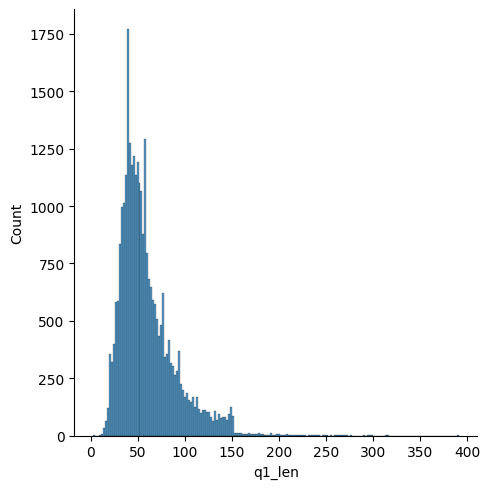

In [21]:
# Analysis of features
# This will analyze the features created above
# This is useful for understanding the distribution of question lengths and common words

sns.displot(new_df['q1_len'])   # This will show the distribution of question 1 lengths
print('minimum characters',new_df['q1_len'].min()) # This will show the minimum number of characters in question 1
print('maximum characters',new_df['q1_len'].max())  # This will show the maximum number of characters in question 1
print('average num of characters',int(new_df['q1_len'].mean())) # This will show the average number of characters in question 1

minimum characters 6
maximum characters 1151
average num of characters 60


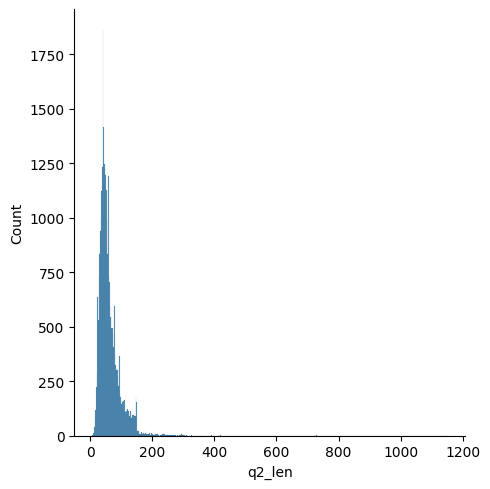

In [22]:
# Analysis of question 2 lengths
# This will analyze the lengths of the second question in each pair
# This is useful for understanding the distribution of question lengths

sns.displot(new_df['q2_len'])   # This will show the distribution of question 2 lengths
print('minimum characters',new_df['q2_len'].min())  # This will show the minimum number of characters in question 2
print('maximum characters',new_df['q2_len'].max())  # This will show the maximum number of characters in question 2
print('average num of characters',int(new_df['q2_len'].mean())) # This will show the average number of characters in question 2

minimum words 1
maximum words 72
average num of words 10


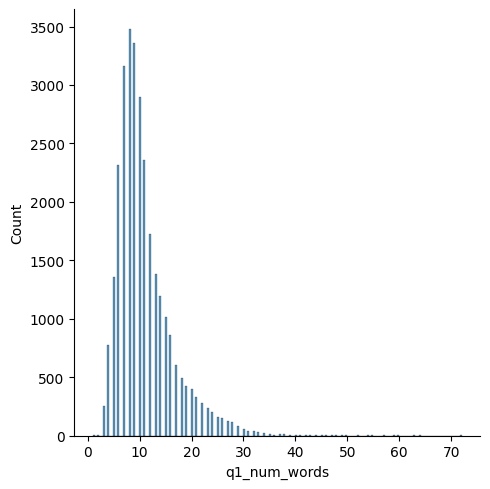

In [23]:
sns.displot(new_df['q1_num_words']) # This will show the distribution of the number of words in question 1
print('minimum words',new_df['q1_num_words'].min()) # This will show the minimum number of words in question 1
print('maximum words',new_df['q1_num_words'].max()) # This will show the maximum number of words in question 1
print('average num of words',int(new_df['q1_num_words'].mean()))    # This will show the average number of words in question 1

minimum words 1
maximum words 237
average num of words 11


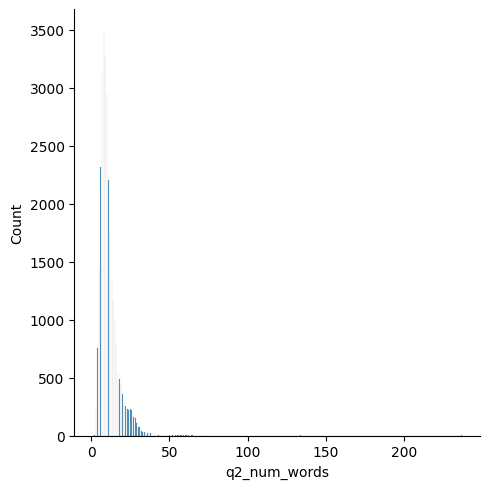

In [24]:
# Analysis of question 2 word counts
# This will analyze the number of words in the second question in each pair

sns.displot(new_df['q2_num_words']) # This will show the distribution of the number of words in question 2
print('minimum words',new_df['q2_num_words'].min()) # This will show the minimum number of words in question 2
print('maximum words',new_df['q2_num_words'].max()) # This will show the maximum number of words in question 2
print('average num of words',int(new_df['q2_num_words'].mean()))    # This will show the average number of words in question 2

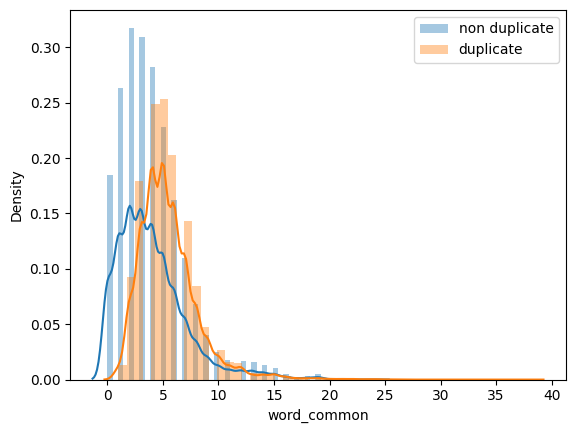

In [25]:
# common words
# This will show the distribution of common words in both questions

sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')  # This will show the distribution of common words in non-duplicate questions
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')  # This will show the distribution of common words in duplicate questions
plt.legend()
plt.show()

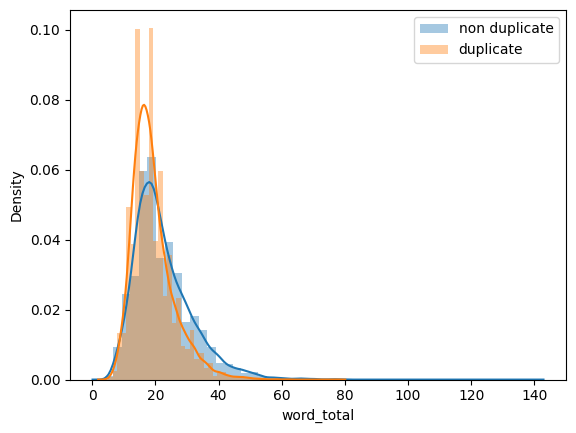

In [26]:
# total words
# This will show the distribution of total words in both questions
# This is useful for understanding the length of questions

sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')   # This will show the distribution of total words in non-duplicate questions
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')   # This will show the distribution of total words in duplicate questions
plt.legend()    # This will add a legend to the plot
plt.show()

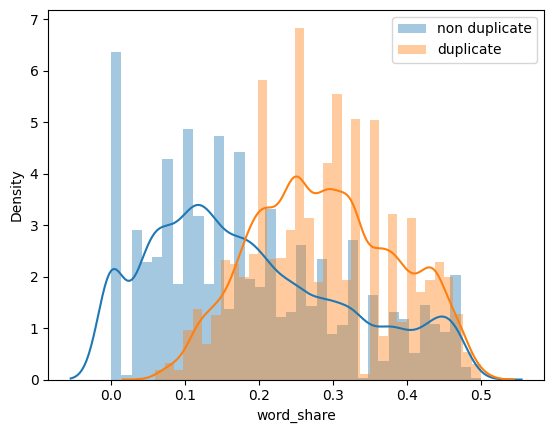

In [27]:
# word share
# This will show the distribution of the share of common words in total words

sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')   # This will show the distribution of word share in non-duplicate questions
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')   # This will show the distribution of word share in duplicate questions
plt.legend()
plt.show()

In [28]:
# Creating Bag of Words features
# This will create features based on the words in the questions
# This is useful for improving the model's performance

ques_df = new_df[['question1','question2']] # This will create a DataFrame with only the questions
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [29]:
# Dropping unnecessary columns
# This will remove the columns that are not needed for further analysis
# This is useful for cleaning the dataset

final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])    # This will drop the specified columns from the DataFrame
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [30]:
# Creating Bag of Words features
# This will create features based on the words in the questions
# This is useful for improving the model's performance

from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2']) # This will combine both questions into a single list

cv = CountVectorizer(max_features=3000) # This will create a CountVectorizer object with a maximum of 3000 features
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2) # This will split the transformed array into two parts: one for question 1 and one for question 2

In [31]:
# Creating DataFrame from the Bag of Words features
# This will create two DataFrames for question1 and question2 features
# This is useful for further analysis and model training

temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)   # This will create a DataFrame for question 1 features
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)   # This will create a DataFrame for question 2 features
temp_df = pd.concat([temp_df1, temp_df2], axis=1)   # This will concatenate the two DataFrames along the columns
temp_df.shape   

(30000, 6000)

In [32]:
# Concatenating the Bag of Words features with the final DataFrame
# This will add the Bag of Words features to the final DataFrame

final_df = pd.concat([final_df, temp_df], axis=1)   # This will concatenate the final DataFrame with the Bag of Words features DataFrame
print(final_df.shape)   # This will print the shape of the final DataFrame with the new features
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Splitting the dataset into training and testing sets
# This will create training and testing sets for the model
# This is useful for evaluating the model's performance

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)
# This will split the final DataFrame into training and testing sets

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7703333333333333

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7625

## Advanced Features

### 1. Token Features
- **cwc_min**: This is the ratio of the number of common words to the length of the smaller question
- **cwc_max**: This is the ratio of the number of common words to the length of the larger question
- **csc_min**: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
- **csc_max**: This is the ratio of the number of common stop words to the larger stop word count among the two questions
- **ctc_min**: This is the ratio of the number of common tokens to the smaller token count among the two questions
- **ctc_max**: This is the ratio of the number of common tokens to the larger token count among the two questions
- **last_word_eq**: 1 if the last word in the two questions is same, 0 otherwise
- **first_word_eq**: 1 if the first word in the two questions is same, 0 otherwise

### 2. Length Based Features
- **mean_len**: Mean of the length of the two questions (number of words)
- **abs_len_diff**: Absolute difference between the length of the two questions (number of words)
- **longest_substr_ratio**: Ratio of the length of the longest substring among the two questions to the length of the smaller question

### 3. Fuzzy Features
- **fuzz_ratio**: fuzz_ratio score from fuzzywuzzy
- **fuzz_partial_ratio**: fuzz_partial_ratio from fuzzywuzzy
- **token_sort_ratio**: token_sort_ratio from fuzzywuzzy
- **token_set_ratio**: token_set_ratio from fuzzywuzzy